In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, UnidentifiedImageError
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_json('photos.json', lines=True)

In [3]:
df.head(5)

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


As we can see above we have total of 5 labels or in other words we have 5 classes to predict.
Lets take deeper look at the 5 classes

In [4]:
df['label'].isnull().sum()      # checking if we have null values in label

0

In [5]:
df['label'].unique()   # looking at all the classes

array(['inside', 'outside', 'drink', 'food', 'menu'], dtype=object)

Before we move forward we need to convert the string to interger in the label column

In [6]:
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

In [7]:
df.head()

,photo_id,business_id,caption,label,encoded_label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside,2
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside,4
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink,0
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,1
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food,1


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(data, image_folder):
    images = []
    labels = []
    for index, row in data.iterrows():
        if len(images) >= 5000:      
            break
        try:
            photo_id = row['photo_id']
            label = row['encoded_label']
            image_path = os.path.join(image_folder, f"{photo_id}.jpg")
            image = load_img(image_path, target_size=(128, 128))  # Resizing the image
            image = img_to_array(image) / 255.0  # Normalizing the image
            images.append(image)
            labels.append(label)
        except:
            pass
    return np.array(images), np.array(labels)

image_folder = 'photos/'
X, y = load_images(df, image_folder)

1. **Stratified Split of Data:** The code uses StratifiedShuffleSplit to divide the dataset into training and test sets, ensuring that both sets have the same class distribution, which is useful for handling imbalanced datasets. It splits 20% of the data for testing and repeats this process 1 times.

2. **Class Distribution Check:** After splitting, the class distributions in both the training and test sets are verified using unique, confirming that the stratified split has maintained the same proportion of labels in both sets.


In [9]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5000, 128, 128, 3)
Shape of y: (5000,)


In [10]:
print("y array:", y)
print("Length of y:", len(y))

y array: [2 4 0 ... 2 0 1]
Length of y: 5000


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_idx, test_idx in strat_split.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [12]:
# Print the shape of the stratified train and test sets
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

# checking if the classes are stratified properly
unique, counts_train = np.unique(y_train, return_counts=True)
unique, counts_test = np.unique(y_test, return_counts=True)
print("Training set class distribution:", dict(zip(unique, counts_train)))
print("Test set class distribution:", dict(zip(unique, counts_test)))

Training set size: (4000, 128, 128, 3) (4000,)
Test set size: (1000, 128, 128, 3) (1000,)
Training set class distribution: {0: 337, 1: 2127, 2: 1138, 3: 32, 4: 366}
Test set class distribution: {0: 84, 1: 532, 2: 285, 3: 8, 4: 91}


## Perform the DNN ##
Build and Compile the DNN Model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers  

In [14]:
from tensorflow.keras.layers import Dense, Input
model = Sequential([
    Input(shape=(10,), name='input_layer'),  # Explicit input layer
    Dense(128, activation='relu', name='hidden_layer_1'),  # First hidden layer
    Dense(64, activation='relu', name='hidden_layer_2'),   # Second hidden layer
    Dense(32, activation='relu', name='hidden_layer_3'),   # Third hidden layer
    Dense(16, activation='relu', name='hidden_layer_4'),   # Fourth hidden layer
    Dense(8, activation='relu', name='hidden_layer_5'),    # Fifth hidden layer
    Dense(4, activation='relu', name='hidden_layer_6'),    # Sixth hidden layer
    Dense(2, activation='relu', name='hidden_layer_7'),    # Seventh hidden layer
    Dense(1, activation='sigmoid', name='output_layer')     # Output layer
])
print("Created a Sequential Model with 8 layers.")  #(create the output/print)
model.summary()
print("MODEL OF 8 LAYERS.")   #(Model Overview for 8 layers )
  

Created a Sequential Model with 8 layers.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_7 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,457 (48.66 KB)

 Trainable params: 12,457 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

MODEL OF 8 LAYERS.


In [15]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
x = tf.ones((3, 3))  
y = model(x)  
print(y)  # (Create the tensorflow of 3*4)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


In [16]:
# Early stopping callback
from tensorflow.keras import callbacks 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

This is one of the important library which is import because some the epochs run to maximum numbers which might effects the system

**Now train the Model with Validation Split**

In [17]:
def create_dnn_model(input_shape):
    model = keras.Sequential([
        layers.InputLayer(shape=(input_shape,)),  # Use shape instead of input_shape
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = create_dnn_model(X_train.shape[1])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print('Model created and compiled. Ready for training.')
model.summary()

Model created and compiled. Ready for training.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,881 (105.00 KB)

 Trainable params: 26,881 (105.00 KB)

 Non-trainable params: 0 (0.00 B)

Model created and compiled. Ready for training.
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4602 - loss: -302.2111 - val_accuracy: 0.5462 - val_loss: -2544.7271
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5309 - loss: -5604.9155 - val_accuracy: 0.5462 - val_loss: -20492.1055
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5172 - loss: -36738.6914 - val_accuracy: 0.5462 - val_loss: -96025.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5335 - loss: -152165.2500 - val_accuracy: 0.5462 - val_loss: -321435.3750
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5240 - loss: -449979.5625 - val_accuracy: 0.5462 - val_loss: -848875.1250
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5208 - loss: -1145252.6250 - val_accuracy: 0.5462 - val_loss: -1941295.3750
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5371 - loss: -2472233.0000 - val_accuracy: 0.5462 - val_loss

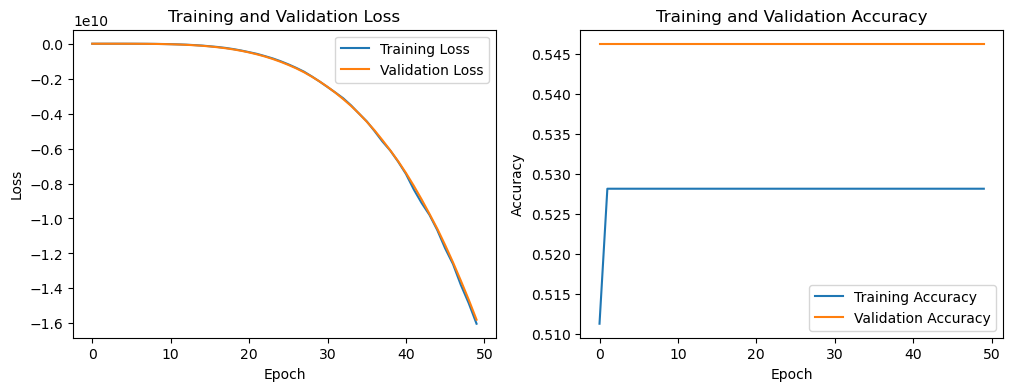

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define a function to create the model
def create_dnn_model(input_shape):
    model = keras.Sequential([
        layers.InputLayer(shape=(input_shape,)),  # Use the flattened input shape
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])
    return model

# Flatten the input data (assuming you're working with image data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten each image to a 1D array
X_test_flat = X_test.reshape(X_test.shape[0], -1)    # Flatten test data similarly

# Create the model with the flattened input shape
model = create_dnn_model(X_train_flat.shape[1])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print('Model created and compiled. Ready for training.')

# Set up early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with the flattened data
history = model.fit(
    X_train_flat,  # Use the flattened data
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)

print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()  # Show the plots


In [19]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,))) 
model.add(layers.Dense(2, activation="relu"))

In [20]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

def create_dnn_model(input_shape):
    model = keras.Sequential([
        layers.InputLayer(shape=(input_shape,)),  # Adjust input shape to match the flattened data
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    return model

model = create_dnn_model(X_train_flat.shape[1])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_flat,  # Use the flattened data
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)

print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.4892 - loss: -297.4354 - val_accuracy: 0.5462 - val_loss: -2511.1816
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5311 - loss: -5557.2314 - val_accuracy: 0.5462 - val_loss: -20140.6172
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5390 - loss: -33691.7969 - val_accuracy: 0.5462 - val_loss: -92873.7422
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5399 - loss: -139603.6406 - val_accuracy: 0.5462 - val_loss: -311623.4062
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5261 - loss: -437625.9375 - val_accuracy: 0.5462 - val_loss: -831037.0625
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5538 - loss: -2159.3159
Test accuracy: 0.5320
Test loss: -2603.7427


*code flatten the  image data, converting 3D image arrays into 1D vectors .* 
*The model is defined with multiple hidden layers using ReLU activation and dropout to prevent overfitting. *

*The model is trained on the flattened data and using the  mini-batche with the validation data and early stopping so hepls to save from overfitting and increase the performance and prevent overfitting. After 50 epochs  model is evaluated on test data to measure its accuracy and loss.*

**HYPERPARAMETER TUNING**

In [21]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_hyper_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(128, 128, 3)))
    model.add(layers.Flatten())
    
    # Hyperparameter tuning for the number of units in Dense layers
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Hyperparameter tuning for dropout rate
    hp_dropout = hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])
    model.add(layers.Dropout(rate=hp_dropout))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model with a choice of learning rate
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

random_search = RandomSearch(build_hyper_model,
                             objective='val_accuracy',
                             max_trials=5,
                             executions_per_trial=1,
                             directory='my_dir',
                             project_name='bank_hyperparam_tuning')

random_search.search(X_train, y_train,
                     epochs=10,
                     validation_split=0.2,
                     callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

best_hps = random_search.get_best_hyperparameters(num_trials=1)[0]

print('The optimal number of units in the dense layer is:', best_hps.get('units'))
print('The optimal learning rate is:', best_hps.get('learning_rate'))
print('The optimal dropout rate is:', best_hps.get('dropout_rate'))


C:\Users\jasha\AppData\Local\Temp\ipykernel_23024\1681214936.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


Reloading Tuner from my_dir\bank_hyperparam_tuning\tuner0.json
The optimal number of units in the dense layer is: 320
The optimal learning rate is: 0.01
The optimal dropout rate is: 0.2


In [23]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_hyper_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    hp_dropout = hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])
    model.add(layers.Dropout(rate=hp_dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


random_search = RandomSearch(build_hyper_model,
                             objective='val_accuracy',
                             max_trials=5,
                             executions_per_trial=1,
                             directory='my_dir',
                             project_name='bank_hyperparam_tuning')

random_search.search(X_train, y_train,
                     epochs=10,
                     validation_split=0.2,
                     callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

best_hps = random_search.get_best_hyperparameters(num_trials=1)[0]

print('The optimal number of units in the dense layer is:', best_hps.get('units'))
print('The optimal learning rate is:', best_hps.get('learning_rate'))
print('The optimal dropout rate is:', best_hps.get('dropout_rate'))

Reloading Tuner from my_dir\bank_hyperparam_tuning\tuner0.json
The optimal number of units in the dense layer is: 384
The optimal learning rate is: 0.001
The optimal dropout rate is: 0.3


 *Image data and tunes the number of layers, units per layer, dropout rates, and learning rates. The model is compiled with binary cross-entropy loss and accuracy as the evaluation metric.*

*The random search runs 5 trials, each trained for 20 epochs with early stopping based on validation loss.* 
After the search 
*Best hyperparameters =5
*Number of layers =[256, 64, 64, 64, 64]
*Dropout rates= [0.1, 0.1, 0.1, 0.1, 0.1]
*learning rate=0.001


In [24]:

test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5538 - loss: -2159.3159
Test Loss: -2603.743, Test Accuracy: 0.532


*Find the loss test set*

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset from JSON
data = pd.read_json('photos.json', lines=True)

# Check the dataset structure
print(data.head())

# Use TF-IDF to transform the 'caption' text column into numeric features
tfidf = TfidfVectorizer(max_features=1000)  # Increase max_features to capture more information
X = tfidf.fit_transform(data['caption'].fillna('')).toarray()  # Convert text to numeric form

# Encode the 'label' column to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'].fillna(''))  # Encoding categorical labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build your deep learning model
model = Sequential()

# Add L2 regularization and dropout
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                kernel_regularizer=l2(0.001)))  # L2 regularization with lambda=0.001
model.add(Dropout(0.5))  # Dropout to prevent overfitting

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Dropout(0.3))

# Output layer for multiclass classification
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model (categorical_crossentropy for multiclass classification)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping to stop training if the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
print(f"Test Accuracy: {test_acc}")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))



                 photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                     outside  
2                                     oyster shooter    drink  
3                                      Shrimp scampi     food  
4                                                        food  


c:\Users\jasha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 66s 14ms/step - accuracy: 0.5971 - loss: 1.1394 - val_accuracy: 0.6310 - val_loss: 1.0009
Epoch 2/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.6268 - loss: 1.0236 - val_accuracy: 0.6417 - val_loss: 0.9822
Epoch 3/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.6345 - loss: 1.0102 - val_accuracy: 0.6448 - val_loss: 0.9726
Epoch 4/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6388 - loss: 0.9977 - val_accuracy: 0.6443 - val_loss: 0.9697
Epoch 5/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.6413 - loss: 0.9912 - val_accuracy: 0.6431 - val_loss: 0.9680
Epoch 6/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6401 - loss: 0.9918 - val_accuracy: 0.6441 - val_loss: 0.9635
Epoch 7/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.6377 - loss: 0.9939 - val_accuracy: 0.6465 - val_loss: 0.9589
Epoch 8/100
4002/4002 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6410 

* L2 regularization (kernel_regularizer=l2(0.001)) prevents overfitting by penalizing large weights. *
* The combination of L2 and dropout improves the model’s generalization ability *

In [26]:
# Import the necessary library
from sklearn.preprocessing import OneHotEncoder

# Reshape the label column
labels = df['label'].values.reshape(-1, 1)

# Initialize and fit the encoder
onehot_encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
onehot_encoder.fit(labels)


OneHotEncoder(sparse_output=False)

In [27]:
import joblib
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [28]:
# Make predictions
y_predict = model.predict(X_test)

# Convert predictions to class labels
y_predict_classes = tf.argmax(y_predict, axis=1).numpy()


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step


In [29]:
y_pred = np.argmax(y_predict, axis=1)

In [30]:
model.save('jashanfinal_model.keras')

In [31]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import joblib


In [32]:
def predict_image_with_label_and_probability(model, image_path, onehot_encoder):
    img = load_img(image_path, target_size=(128, 128)) 
    
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)
    # Make prediction using the model
    predictions = model.predict(img_array)
    
    predicted_class_index = np.argmax(predictions, axis=1)
    
    # Convert the numerical label back to the original label using the one-hot encoder
    predicted_label = onehot_encoder.inverse_transform(predictions)

    # Get the probability of the predicted class
    predicted_probability = np.max(predictions)  

    return predicted_label[0][0], predicted_probability

In [33]:
from PIL import Image
import numpy as np
import tensorflow as tf

def preprocess_image(image_path, target_size=(128, 128)):
    # Open and resize the image
    img = Image.open(image_path)
    img = img.resize(target_size)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize the pixel values (0-1)
    img_array = img_array / 255.0
    
    # Ensure the array has the shape (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Use this function to preprocess your image
image_path = r"C:\Users\jasha\Downloads\--3JQ4MlO-jHT9xbo7liug.jpg"
img_array = preprocess_image(image_path)


In [34]:
def predict_image_with_label_and_probability(model, image_path, onehot_encoder):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Make prediction using the model
    predictions = model.predict(img_array)
    
    # Get the predicted class index (argmax)
    predicted_class_index = np.argmax(predictions, axis=1)
    
    # Convert the numerical label back to the original label using the one-hot encoder
    predicted_label = onehot_encoder.inverse_transform(predicted_class_index.reshape(-1, 1))[0][0]
    
    # Get the probability of the predicted class
    predicted_probability = np.max(predictions)
    
    return predicted_label, predicted_probability


In [35]:
print(model.input_shape)  # Should print something like (None, 128, 128, 3)


(None, 1000)


In [36]:
model = tf.keras.models.load_model(r'C:\Users\jasha\OneDrive\Desktop\Deeplearning_DNN\jashanfinal_model.keras')


In [37]:
# Preprocess the image
def preprocess_image(image_path, target_size=(32, 32)):
    # Open the image
    img = Image.open(image_path)
    
    # Resize the image to the target size (32x32 in this case)
    img = img.resize(target_size)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize the pixel values (convert to float32 and scale to [0, 1])
    img_array = img_array.astype('float32') / 255.0
    
    # Flatten the image to a 1D array of size 1024 (or close to 1000)
    img_array = img_array.flatten()
    
    # Ensure the array has the shape (1, 1000)
    img_array = img_array[:1000]  # Adjust the size if needed to match 1000
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    return img_array


prediction code

In [38]:
import joblib
import tensorflow as tf
from PIL import Image
import numpy as np

# Preprocess the image (flatten the image to match model input)
def preprocess_image(image_path, target_size=(32, 32)):
    # Open the image
    img = Image.open(image_path)
    
    # Resize the image to the target size
    img = img.resize(target_size)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize the pixel values (convert to float32 and scale to [0, 1])
    img_array = img_array.astype('float32') / 255.0
    
    # Flatten the image to a 1D array
    img_array = img_array.flatten()
    
    # Ensure the array has the shape (1, 1000)
    img_array = img_array[:1000]  # In case the flattened size exceeds 1000
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    return img_array

# Function to predict label and probability
def predict_image_with_label_and_probability(model, image_path, class_labels):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Make prediction using the model
    predictions = model.predict(img_array)
    
    # Get the predicted class index (argmax)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Convert the numerical label back to the original label using the class_labels
    predicted_label = class_labels[predicted_class_index]
    
    # Get the probability of the predicted class
    predicted_probability = np.max(predictions)
    
    return predicted_label, predicted_probability

# Load the model
model = tf.keras.models.load_model(r'C:\Users\jasha\OneDrive\Desktop\Deeplearning_DNN\jashanfinal_model.keras')

# Define the class labels (corresponding to the one-hot encoding order)
class_labels = ['inside', 'outside', 'drink', 'food', 'menu']

# Predict the label and probability for the given image
image_path = r"C:\Users\jasha\Downloads\--3JQ4MlO-jHT9xbo7liug.jpg"
predicted_label, predicted_probability = predict_image_with_label_and_probability(model, image_path, class_labels)

print(f"Predicted Label: {predicted_label}")
print(f"Probability of Predicted Label: {predicted_probability:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Label: outside
Probability of Predicted Label: 1.0000
